In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
# datos de entrada 
N = 253 # día del año

phi = 18.839444 * np.pi / 180 # latitud

L_loc = - 99.235278 * np.pi / 180 # longitud local

L_zh = - 90 * np.pi / 180 # longitud de referencia

C_1 = 0 # horario de verano

t_est = 12 + 27 / 60 # hora del día

In [3]:
# declinacion
delta = 0.4093 * np.sin(2 * np.pi * (284 + N) / 365)

In [4]:
# duracion del dia
omega_o = np.arccos(-np.tan(delta)*np.tan(phi))
t_d = 24 * omega_o / np.pi
omega_a = - omega_o

In [5]:
# hora amanecer y ocaso en tiempo estándar
t_so = 12 * omega_o / np.pi + 12

t_sa = - 12 * omega_o / np.pi + 12

B = (N - 81) * 2 * np.pi / 364

E_t = 9.87 * np.sin(2 * B) - 7.53 * np.cos(B) - 1.5 * np.sin(B)

t_esto = (t_so) - 12 * (L_loc - L_zh) / np.pi + C_1 + (E_t / 60)

t_esta = (t_sa) - 12 * (L_loc - L_zh) / np.pi + C_1 + (E_t / 60)

In [6]:
#acimut
t_est = np.arange(0,25)
t_sol = t_est + 12 * (L_loc - L_zh) / np.pi + (9.87 * np.sin(2 * (N - 81) * 2 * np.pi / 364) - 7.53 * np.cos((N - 81) * 2 * np.pi / 364) - 1.5 * np.sin((N - 81) * 2 * np.pi / 364)) / 60 + C_1
omega = np.pi * (t_sol - 12) / 12
gamma_s = np.arctan2(np.sin(omega)* np.cos(delta),np.sin(phi) * np.cos(omega) * np.cos(delta) - np.cos(phi) * np.sin(delta))
np.rad2deg(gamma_s)

array([ 159.69965216, -163.31751557, -134.9757174 , -118.79290562,
       -108.9685728 , -102.12751439,  -96.70107694,  -91.8441693 ,
        -86.93532174,  -81.25439156,  -73.48147644,  -60.14386292,
        -29.96536375,   25.00008151,   58.11315116,   72.45119438,
         80.57635521,   86.39558644,   91.34637032,   96.18061081,
        101.51514656,  108.15438735,  117.55486088,  132.83149697,
        159.69965216])

In [7]:
print("delta =",np.rad2deg(delta))

delta = 4.215735423754397


In [8]:
print("t_d =",t_d," h")

t_d = 12.192152805466028  h


In [9]:
print("t_a =",t_esta," h")

t_a = 6.583280812428684  h


In [10]:
print("t_o =",t_esto," h")

t_o = 18.775433617894713  h


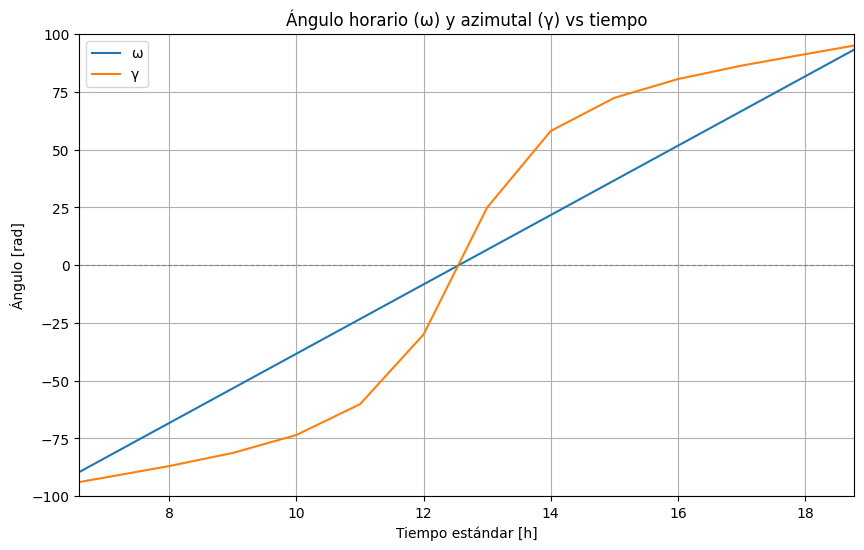

In [11]:
plt.figure(figsize=(10,6))
plt.plot(t_est, np.rad2deg(omega), label="ω")
plt.plot(t_est, np.rad2deg(gamma_s), label="γ")

plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.xlabel("Tiempo estándar [h]")
plt.ylabel("Ángulo [rad]")
plt.title("Ángulo horario (ω) y azimutal (γ) vs tiempo")
plt.xlim(t_esta, t_esto)
plt.ylim(-100, 100)
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# altura
alpha = np.arcsin(np.sin(phi) * np.sin(delta) + np.cos(phi) * np.cos(delta) * np.cos(omega))
# cenital
theta_z = np.pi / 2 - alpha

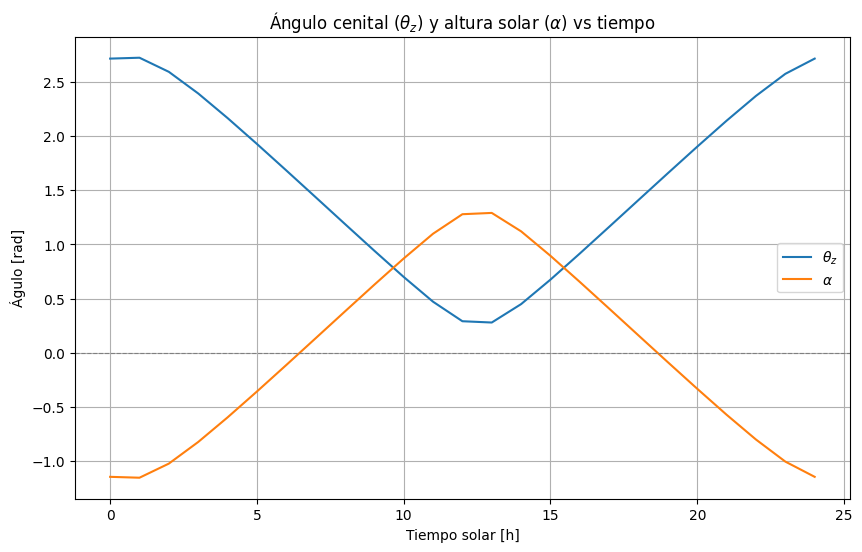

In [13]:
plt.figure(figsize=(10,6))
plt.plot(t_est, theta_z, label=r"$\theta_z$")
plt.plot(t_est, alpha, label=r"$\alpha$")

plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.xlabel("Tiempo solar [h]")
plt.ylabel("Águlo [rad]")
plt.title(r"Ángulo cenital ($\theta_z$) y altura solar ($\alpha$) vs tiempo")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
t_m = 12 - np.pi * (L_loc - L_zh) / 12 - C_1 - E_t / 60
print("t_m = ",t_m, " h")

t_m =  11.978526383168898  h
